In [7]:
from sklearn.cluster import OPTICS, cluster_optics_dbscan
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.datasets import load_boston, load_iris

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.OPTICS.html#sklearn.cluster.OPTICS

In [8]:
#x, y = load_iris(return_X_y=True)
x, y = load_boston(return_X_y=True)
scaler = StandardScaler()
x = scaler.fit_transform(x)
x = x[:,[1,7]]
x.shape

(506, 2)

In [131]:
# nx=3
# for i in range(0,12):
#     plt.figure()
#     plt.scatter(x=x[:,nx], y=x[:,i])
#     plt.title('X:' + str(nx) + ' ; Y:' + str(i))
#     plt.plot()

Text(0.5, 1.0, 'Reachability Plot')

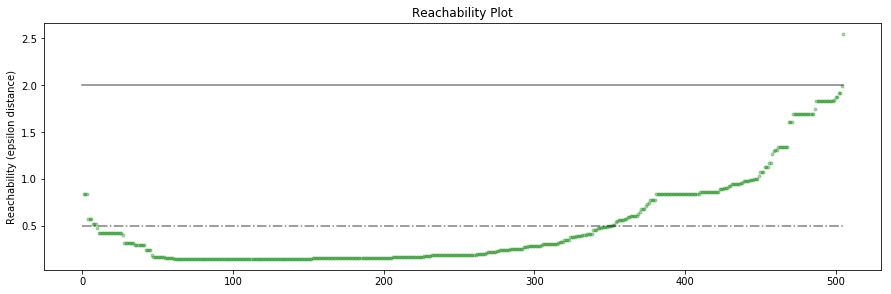

In [153]:
clust = OPTICS(min_samples=int(0.1*len(x)), xi=0.05, min_cluster_size=0.05)
clust.fit(x)

plt.figure(figsize=(15, 10))
G = gridspec.GridSpec(2, 3)
ax1 = plt.subplot(G[0, :])

colors = ['g.', 'r.', 'b.', 'y.', 'c.']
for klass, color in zip(range(0, 5), colors):
    Xk = space[labels == klass]
    Rk = reachability[labels == klass]
    ax1.plot(Xk, Rk, color, alpha=0.3)
    
ax1.plot(space[labels == -1], reachability[labels == -1], 'k.', alpha=0.3)
ax1.plot(space, np.full_like(space, 2., dtype=float), 'k-', alpha=0.5)
ax1.plot(space, np.full_like(space, 0.5, dtype=float), 'k-.', alpha=0.5)
ax1.set_ylabel('Reachability (epsilon distance)')
ax1.set_title('Reachability Plot')

In [143]:
labels_050 = cluster_optics_dbscan(reachability=clust.reachability_,
                                   core_distances=clust.core_distances_,
                                   ordering=clust.ordering_, eps=0.5)

labels_200 = cluster_optics_dbscan(reachability=clust.reachability_,
                                   core_distances=clust.core_distances_,
                                   ordering=clust.ordering_, eps=2)

In [144]:
space = np.arange(len(x))
reachability = clust.reachability_[clust.ordering_]
labels = clust.labels_[clust.ordering_]

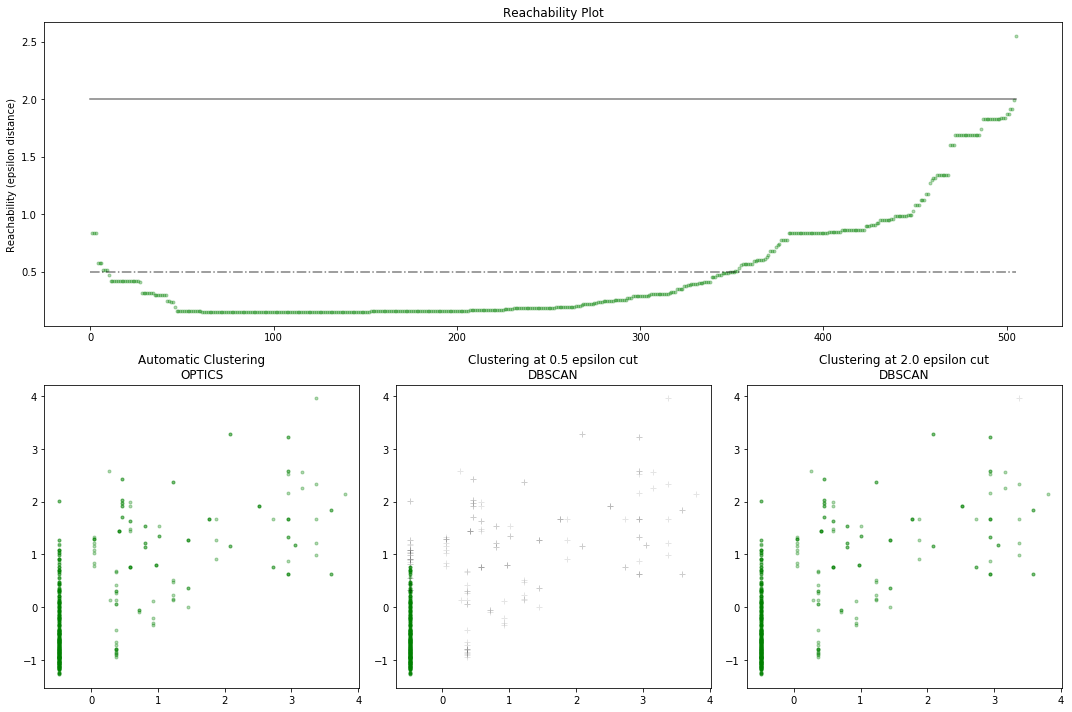

In [145]:
c
G = gridspec.GridSpec(2, 3)
ax1 = plt.subplot(G[0, :])
ax2 = plt.subplot(G[1, 0])
ax3 = plt.subplot(G[1, 1])
ax4 = plt.subplot(G[1, 2])

colors = ['g.', 'r.', 'b.', 'y.', 'c.']
for klass, color in zip(range(0, 5), colors):
    Xk = space[labels == klass]
    Rk = reachability[labels == klass]
    ax1.plot(Xk, Rk, color, alpha=0.3)
    
ax1.plot(space[labels == -1], reachability[labels == -1], 'k.', alpha=0.3)
ax1.plot(space, np.full_like(space, 2., dtype=float), 'k-', alpha=0.5)
ax1.plot(space, np.full_like(space, 0.5, dtype=float), 'k-.', alpha=0.5)
ax1.set_ylabel('Reachability (epsilon distance)')
ax1.set_title('Reachability Plot')

colors = ['g.', 'r.', 'b.', 'y.', 'c.']
for klass, color in zip(range(0, 5), colors):
    Xk = x[clust.labels_ == klass]
    ax2.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax2.plot(x[clust.labels_ == -1, 0], x[clust.labels_ == -1, 1], 'k+', alpha=0.1)
ax2.set_title('Automatic Clustering\nOPTICS')

# DBSCAN at 0.5
colors = ['g', 'greenyellow', 'olive', 'r', 'b', 'c']
for klass, color in zip(range(0, 6), colors):
    Xk = x[labels_050 == klass]
    ax3.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3, marker='.')
ax3.plot(x[labels_050 == -1, 0], x[labels_050 == -1, 1], 'k+', alpha=0.1)
ax3.set_title('Clustering at 0.5 epsilon cut\nDBSCAN')

# DBSCAN at 2.
colors = ['g.', 'm.', 'y.', 'c.']
for klass, color in zip(range(0, 4), colors):
    Xk = x[labels_200 == klass]
    ax4.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax4.plot(x[labels_200 == -1, 0], x[labels_200 == -1, 1], 'k+', alpha=0.1)
ax4.set_title('Clustering at 2.0 epsilon cut\nDBSCAN')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Automatic Clustering\nOPTICS')

In [250]:
x, y = load_boston(return_X_y=True)
scaler = StandardScaler()
x = scaler.fit_transform(x)
x = x[:,[1,7]]
x.shape

(506, 2)

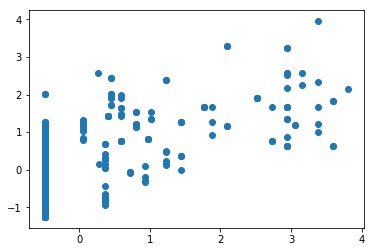

In [251]:
plt.scatter(x=X[:,0], y=X[:,1])

https://dataplatform.cloud.ibm.com/analytics/notebooks/54d79c2a-f155-40ec-93ec-ed05b58afa39/view?access_token=6d8ec910cf2a1b3901c721fcb94638563cd646fe14400fecbb76cea6aaae2fb1

In [303]:
def get_avg_knn_dist(values, k):
    nbrs = NearestNeighbors(n_neighbors=k+1).fit(values) # +1 because first neighbour is the point itself
    distances, indices = nbrs.kneighbors(values)
    
    return np.sort(distances[:,1:].mean(axis=1))

def get_distances_to_line(values):
    nPoints = len(values)
    allCoord = np.vstack((range(nPoints), values)).T

    firstPoint = allCoord[0]
    lineVec = allCoord[-1] - allCoord[0]
    lineVecNorm = lineVec / np.sqrt(np.sum(lineVec**2))

    vecFromFirst = allCoord - firstPoint

    scalarProduct = np.sum(vecFromFirst * np.matlib.repmat(lineVecNorm, nPoints, 1), axis=1)
    vecFromFirstParallel = np.outer(scalarProduct, lineVecNorm)
    vecToLine = vecFromFirst - vecFromFirstParallel

    distToLine = np.sqrt(np.sum(vecToLine ** 2, axis=1))

    return distToLine

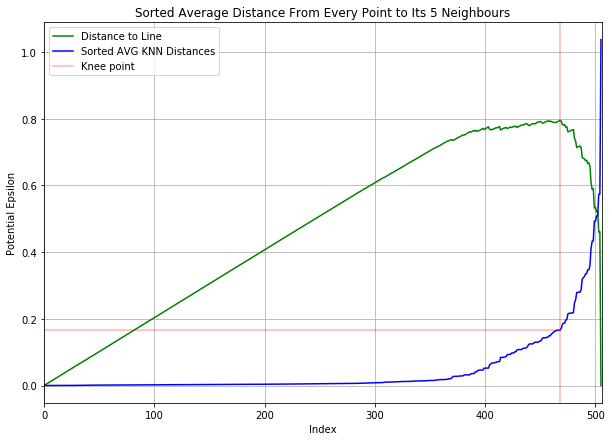

In [313]:
K=5

plt.figure(figsize=(10, 7))

plt.plot(distToLine, label='Distance to Line', c='g')
plt.plot(avg_distances, label='Sorted AVG KNN Distances', c='b')

plt.xlim((0,len(avg_distances)))

plt.axhline(y=avg_distances[idxOfBestPoint], xmin=0, xmax=idxOfBestPoint / len(avg_distances), c='r', alpha=0.3)
plt.axvline(x=idxOfBestPoint, c='r', alpha=0.3, label='Knee point')
plt.xlabel('Index')

plt.title('Sorted Average Distance From Every Point to Its ' + str(K) + ' Neighbours')
plt.xlabel('Index')
plt.ylabel('Potential Epsilon')

plt.legend()
plt.grid()

# -------------------

In [3]:
#pip install pyclustering

from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster.optics import optics, ordering_analyser, ordering_visualizer

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt

In [4]:
x, y = load_boston(return_X_y=True)
scaler = StandardScaler()
x = scaler.fit_transform(x)
x = x[:,[1,7]]
x.shape

(506, 2)

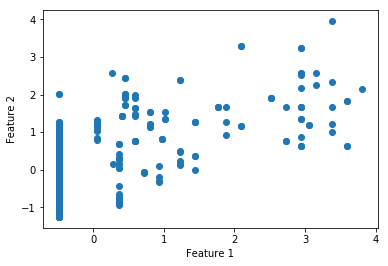

In [5]:
plt.scatter(x=x[:,0], y=x[:,1])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2');

In [6]:
# Run cluster analysis where connectivity radius (eps) is bigger than real.
optics_instance = optics(x, eps=0.5, minpts=3) # required amount of clusters can be specified via amount_clusters

# Performs cluster analysis.
optics_instance.process()

In [7]:
# Obtain results of clustering.
clusters = optics_instance.get_clusters()
noise = optics_instance.get_noise()
ordering = optics_instance.get_ordering()

In [8]:
connvectivity_radius, _ = ordering_analyser(ordering).calculate_connvectivity_radius(amount_clusters=2)
connvectivity_radius

0.4771951200605594

In [9]:
cluster_amount, _ = ordering_analyser(ordering).extract_cluster_amount(radius=connvectivity_radius)
cluster_amount

2

In [10]:
noise

[345, 346, 349, 350, 351, 352, 353, 354, 355]

In [11]:
len(np.hstack(clusters))

NameError: name 'np' is not defined

In [12]:
len(ordering)

494

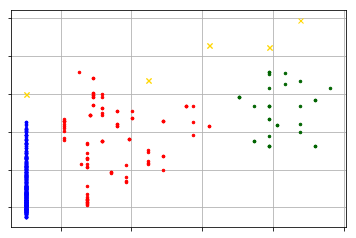

In [14]:
# Visualize clustering results.
visualizer = cluster_visualizer()
visualizer.append_clusters(clusters, x)
visualizer.append_cluster(noise, x, marker='x')
visualizer.show();

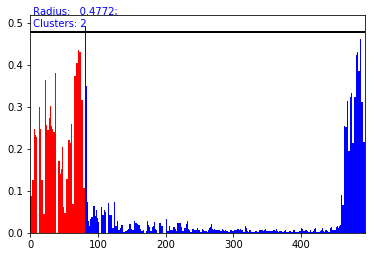

In [15]:
# Display ordering.
analyser = ordering_analyser(ordering)
ordering_visualizer.show_ordering_diagram(analyser, 2)

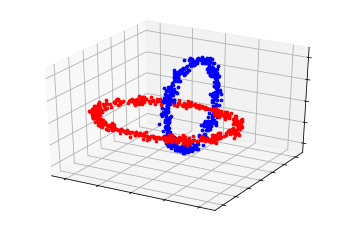

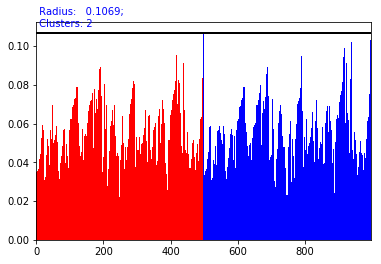

In [16]:
from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster.optics import optics, ordering_analyser, ordering_visualizer
from pyclustering.samples.definitions import FCPS_SAMPLES
from pyclustering.utils import read_sample
# Read sample for clustering from some file.
sample = read_sample(FCPS_SAMPLES.SAMPLE_CHAINLINK)
# Run cluster analysis where connectivity radius is bigger than real.
radius = 0.5
neighbors = 3
optics_instance = optics(sample, radius, neighbors)
# Performs cluster analysis.
optics_instance.process()
# Obtain results of clustering.
clusters = optics_instance.get_clusters()
noise = optics_instance.get_noise()
ordering = optics_instance.get_ordering()
# Visualize clustering results.
visualizer = cluster_visualizer()
visualizer.append_clusters(clusters, sample)
visualizer.show()
# Display ordering.
analyser = ordering_analyser(ordering)
ordering_visualizer.show_ordering_diagram(analyser, 2)

In [118]:
def show_ordering_diagram(analyser, amount_clusters = None, eps_max=None, eps_step=0.05, show_grid=True):

    ordering = analyser.cluster_ordering
    axis = plt.subplot(111)

    if amount_clusters is not None:
        radius, borders = analyser.calculate_connvectivity_radius(amount_clusters)

        # divide into cluster groups to visualize by colors
        left_index_border = 0
        current_index_border = 0
        for index_border in range(len(borders)):
            right_index_border = borders[index_border]
            axis.bar(range(left_index_border, right_index_border), ordering[left_index_border:right_index_border], width = 1.0, color = color_list.TITLES[index_border])
            left_index_border = right_index_border
            current_index_border = index_border

        axis.bar(range(left_index_border, len(ordering)), ordering[left_index_border:len(ordering)], width = 1.0, color = color_list.TITLES[current_index_border + 1])

        plt.xlim([0, len(ordering)])

        plt.axhline(y = radius, linewidth = 2, color = 'black')
        plt.text(0, radius + radius * 0.03, " Radius:   " + str(round(radius, 4)) + ";\n Clusters: " + str(amount_clusters), color = 'b', fontsize = 10)

    else:
        axis.bar(range(0, len(ordering)), ordering[0:len(ordering)], width = 1.0, color = 'black')
        plt.xlim([0, len(ordering)])

    plt.ylabel('Eps')
    plt.grid(show_grid)
    
    if eps_max:
        plt.yticks(np.arange(0, eps_max, eps_step))
    plt.show()

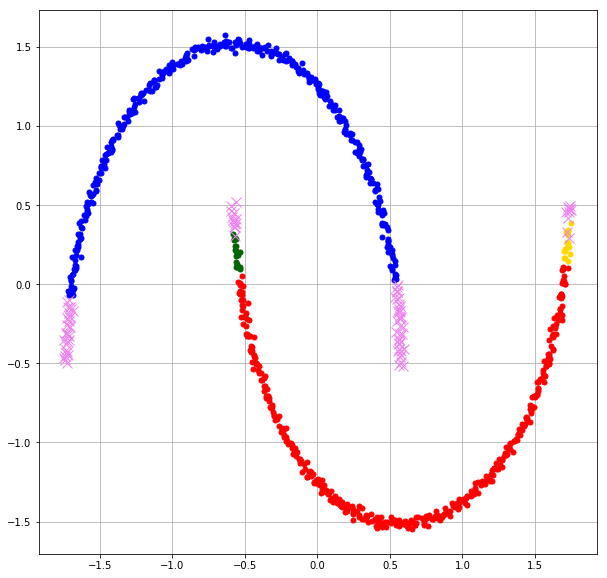

(1, [])


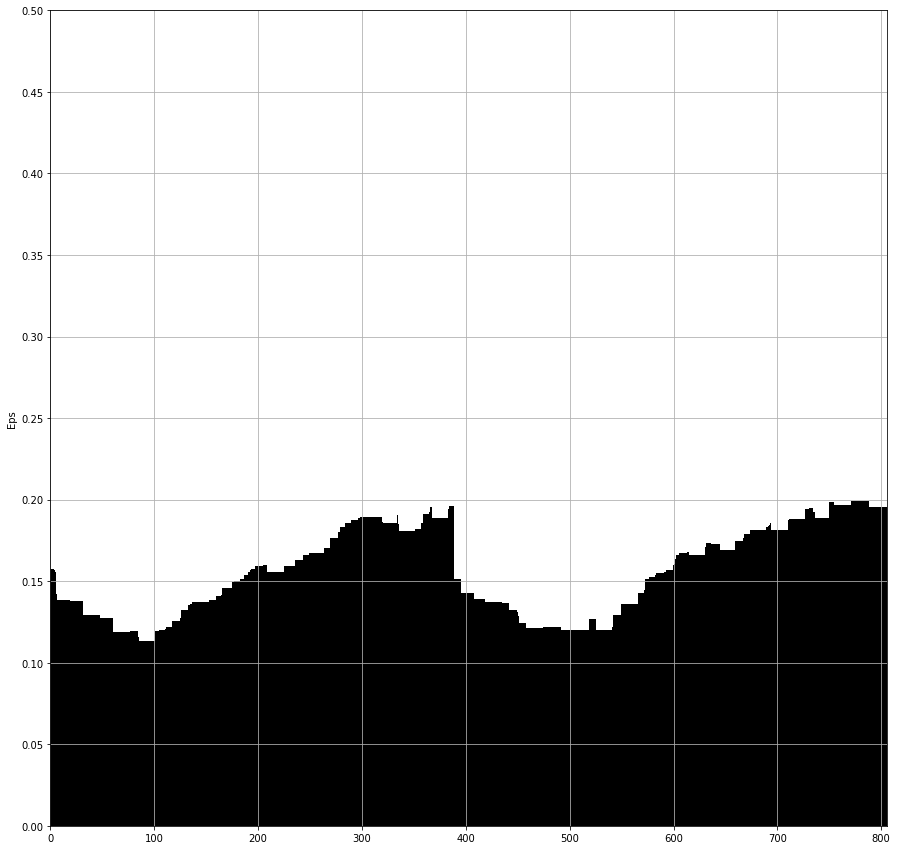

In [170]:
import random;

from pyclustering.cluster import cluster_visualizer;
from pyclustering.cluster.optics import optics, ordering_analyser, ordering_visualizer;

from pyclustering.utils import read_sample, timedcall;

from pyclustering.samples.definitions import SIMPLE_SAMPLES, FCPS_SAMPLES;

import numpy as np


def template_clustering(eps, minpts, amount_clusters = None, visualize = True, ccore = False):
    #x, y = load_boston(return_X_y=True)
    #scaler = StandardScaler()
    #x = scaler.fit_transform(x)
    #x = x[:,[1,7]]
    sample = x
    
    optics_instance = optics(sample, eps, minpts, amount_clusters, ccore);
    optics_instance.process()
    
    if (visualize is True):
        clusters = optics_instance.get_clusters();
        noise = optics_instance.get_noise();
    
        fig1 = plt.figure(figsize=(10, 10))
        visualizer = cluster_visualizer();
        visualizer.append_clusters(clusters, sample, markersize=10);
        visualizer.append_cluster(noise, sample, marker = 'x', markersize=10);
        visualizer.show(fig1, display=True, invisible_axis=False);
    
        fig2 = plt.figure(figsize=(15, 15))
        ordering = optics_instance.get_ordering();
        analyser = ordering_analyser(ordering);
        print(analyser.extract_cluster_amount(0.2))
        show_ordering_diagram(analyser, amount_clusters, eps_max=0.51, eps_step=0.05);
        
        
    
template_clustering(0.2, 30);

In [161]:
from sklearn import datasets
noisy_moons = datasets.make_moons(n_samples=900, noise=.01)
x = noisy_moons[0]

scaler = StandardScaler()
x = scaler.fit_transform(x)

# DBSCAN

In [166]:
from pyclustering.cluster.dbscan import dbscan
from pyclustering.cluster import cluster_visualizer

# Sample for cluster analysis.
sample = x
# Create DBSCAN algorithm.
dbscan_instance = dbscan(sample, 0.15, 30)
# Start processing by DBSCAN.
dbscan_instance.process()
# Obtain results of clustering.
clusters = dbscan_instance.get_clusters()
noise = dbscan_instance.get_noise()

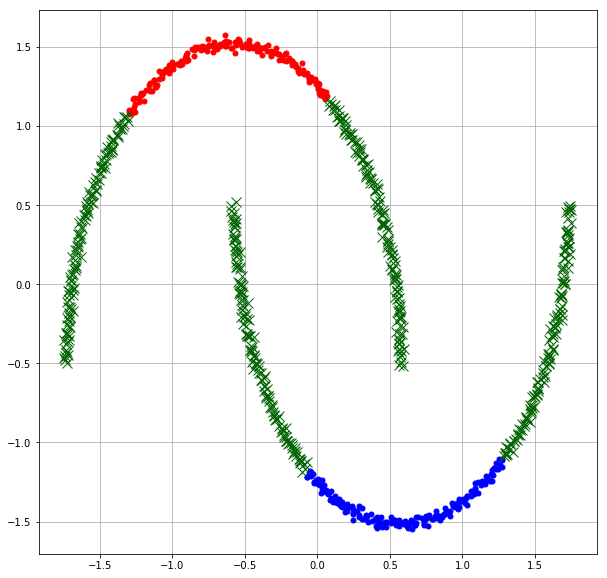

In [167]:
# Visualize clustering results
# visualizer = cluster_visualizer()
# visualizer.append_clusters(clusters, sample)
# visualizer.append_cluster(noise, sample, marker='x')
# visualizer.show();

fig1 = plt.figure(figsize=(10, 10))
visualizer = cluster_visualizer();
visualizer.append_clusters(clusters, sample, markersize=10);
visualizer.append_cluster(noise, sample, marker = 'x', markersize=10);
visualizer.show(fig1, display=True, invisible_axis=False);